<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [12]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2: Generate Descriptive Statistics and Visualizations

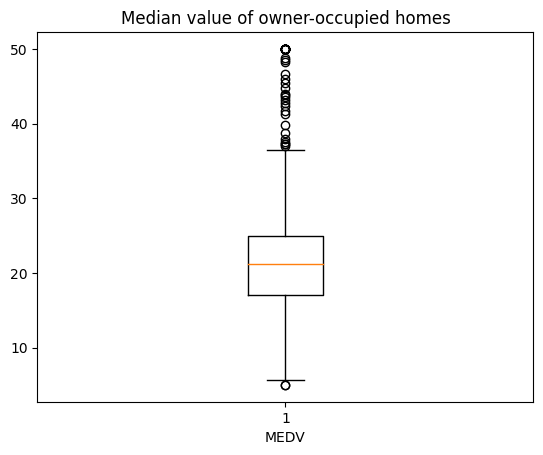

In [48]:
#For the "Median value of owner-occupied homes" provide a boxplot
pyplot.subplot()
_data = boston_df['MEDV']
pyplot.boxplot(x=_data)
pyplot.title("Median value of owner-occupied homes")
pyplot.xlabel("MEDV")
pyplot.show()



#### Majority of values fall after the third quartile (75th percentile) - outliers

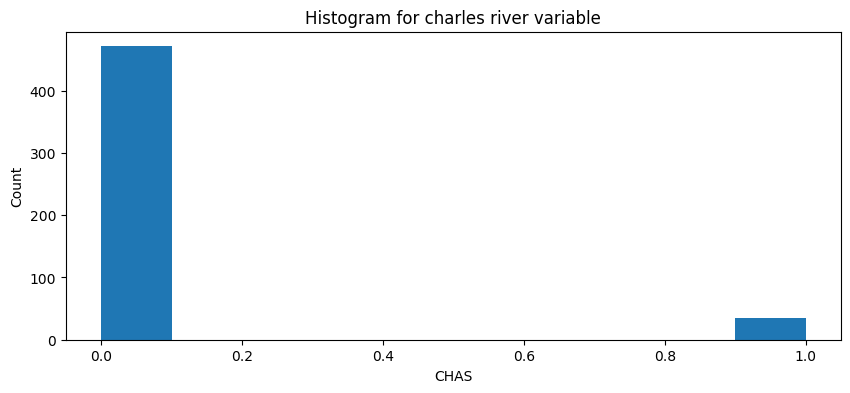

In [107]:
#For the "Median value of owner-occupied homes" provide a boxplot
pyplot.figure(figsize=(10,4))
_data = boston_df['CHAS']
pyplot.hist(_data)
pyplot.title("Histogram for charles river variable")
pyplot.xlabel("CHAS")
pyplot.ylabel("Count")
pyplot.show()



#### Majority of values are out of tract bound (i.e. CHAS = 0)

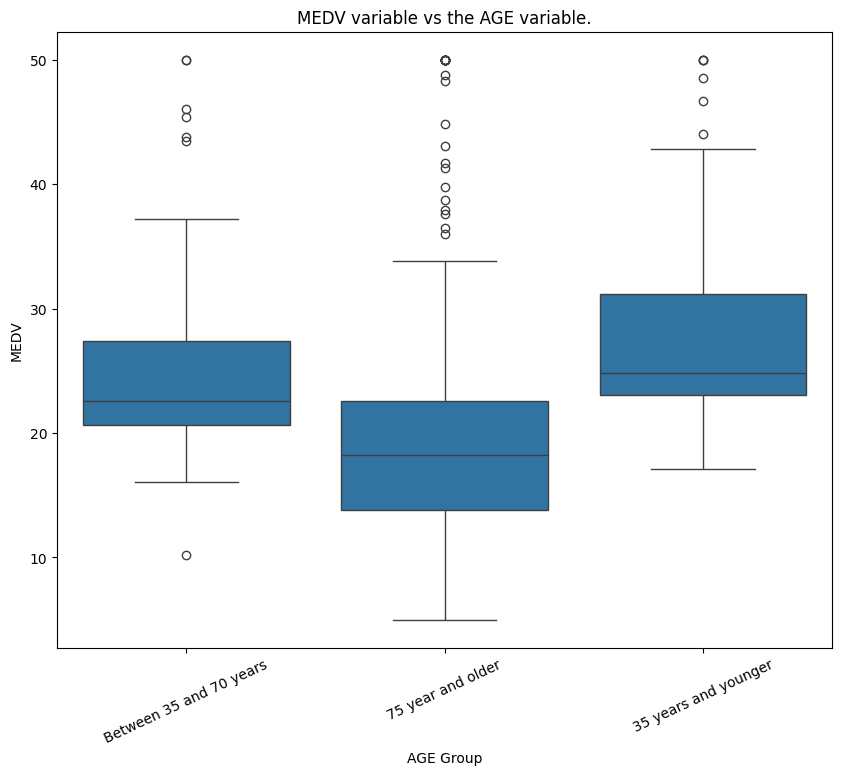

In [106]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[boston_df['AGE'] <= 35, 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'Between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_GROUP'] = '75 year and older'

pyplot.figure(figsize=(10,8))
sns.boxplot(x=boston_df.AGE_GROUP, y=boston_df.MEDV, data=boston_df)
pyplot.title("MEDV variable vs the AGE variable.")
pyplot.xlabel("AGE Group")
pyplot.ylabel("MEDV")
pyplot.xticks(rotation = 25)
#Show the plot
pyplot.show()

#### Younger people (below 35) take expensive homes and older people moving to cheaper hours
#### Few rich old people(above 75) prefer expensive home ( outliers)

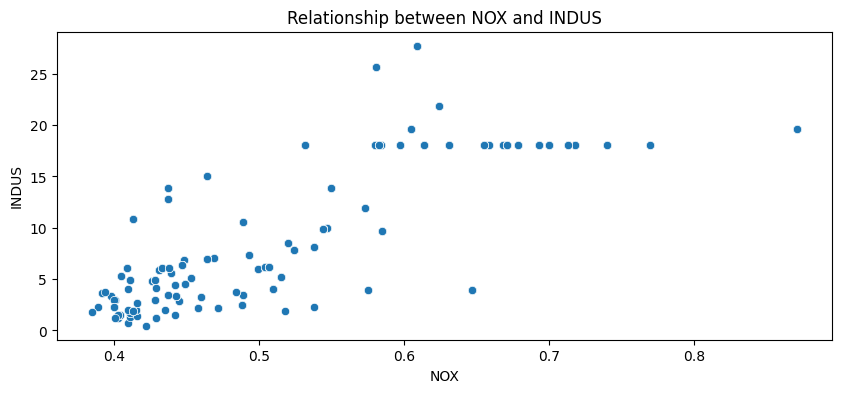

In [89]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. What can you say about the relationship?
pyplot.figure(figsize=(10,4))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

#### Linear relationship between NOX and INDUS upto NOX <= 0.6
#### INDUS has no impact when NOX rise above threshold of 0.6

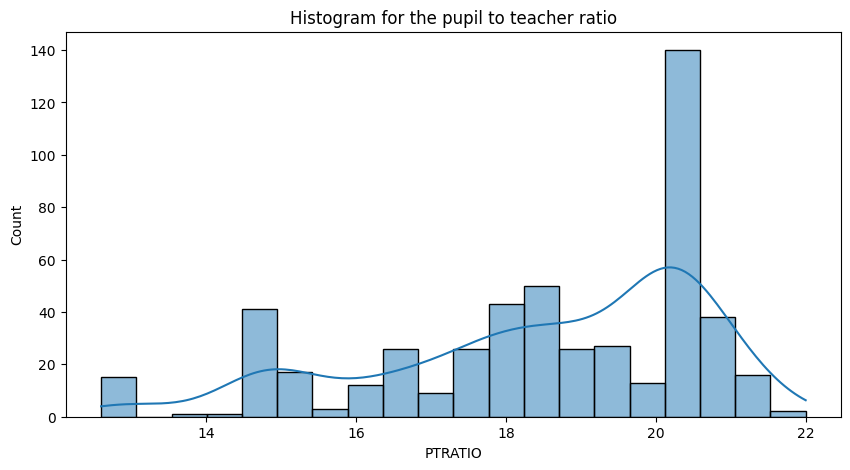

In [118]:
#Create a histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(10,5))
sns.histplot(data=boston_df.PTRATIO, bins=20,kde=True)
pyplot.title("Histogram for the pupil to teacher ratio")
pyplot.show()

#### PTRATIO is left skewed with highest values in 20-21 bucket

# Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

> Null Hypothesis - Bounder Charles river median value is SAME otherwise river median value

> Alternate Hypothesis - Bounder Charles river median value is NOT SAME as otherwise river median value


In [122]:
river_bound = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_otherwise = boston_df[boston_df['CHAS'] == 0]['MEDV']

# ttest 
ttest = scipy.stats.ttest_ind(river_bound,river_otherwise,axis=0,equal_var=True)
pval = ttest.pvalue
print('T student result = ',ttest)

if pval > 0.05:
    print('Null Hypothesis - Bounder Charles river median value is SAME otherwise river median value')
else:
    print('Alternate Hypothesis - Bounder Charles river median value is NOT SAME as otherwise river median value')
    

T student result =  TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)
Alternate Hypothesis - Bounder Charles river median value is NOT SAME as otherwise river median value


##### Since pvalue < 0.05 Null Hypothesis is Rejected i.e. Bounded and otherwise median value are statistically different

####  Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

> NULL Hypothesis - All age group median house values are statistically same
> ALTERNATE Hypothesis - All age group median values are statistically different

In [133]:
before_35 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
between_35_and_70 = boston_df[boston_df['AGE_GROUP'] == 'Between 35 and 70 years']['MEDV']
older_than_75 = boston_df[boston_df['AGE_GROUP'] == '75 year and older']['MEDV']

result = scipy.stats.f_oneway(before_35,between_35_and_70,older_than_75)
print(result)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


##### Rejected the NULL Hypothesis as pvalue < 0.05 threshhold

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

> Null Hypothesis - Nitric Oxide has no relationship with non-retail business

> Alternate Hypothesis - Nitric Oxide is statistically related with non-retail business

In [149]:
print('------Correlation matrix between NOX and INDUS----------')
print(boston_df[['NOX','INDUS']].corr())
print('----------------------------')

nox = boston_df['NOX']
indus = boston_df['INDUS']

result = scipy.stats.pearsonr(nox,indus)
print('Correlation = ',result.statistic) # Strongly positive correlated with 0.76
print('Pvalue = ',result.pvalue)



------Correlation matrix between NOX and INDUS----------
            NOX     INDUS
NOX    1.000000  0.763651
INDUS  0.763651  1.000000
----------------------------
Correlation =  0.7636514469209192
Pvalue =  7.913361061210442e-98


##### As pvalue is less than 0.05 null hypothesis is rejected i.e NOX and INDUS are statistically related.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [163]:
MEDV = boston_df['MEDV']
DIS = boston_df['DIS']

X0 = sm.add_constant(DIS)
results = sm.OLS(MEDV,X0).fit()
print(results.summary())

coeff = results.rsquared**0.5
pvalue = results.f_pvalue
print('\n'*3)
print('Coefficient = ',coeff)
print('PValue = ',pvalue)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        22:49:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

##### MEDV has 24% impact for changes in weighted distance for employment centres
##### Pvalue is < 0.05 which implies that MEDV is related to DIS